# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS data.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [1]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.


In [3]:
# Visualiza el DataFrame
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.min()

id                             8670
diagnosis                         B
radius_mean                   6.981
texture_mean                   9.71
perimeter_mean                43.79
area_mean                     143.5
smoothness_mean             0.05263
compactness_mean            0.01938
concavity_mean                  0.0
concave points_mean             0.0
symmetry_mean                 0.106
fractal_dimension_mean      0.04996
radius_se                    0.1115
texture_se                   0.3602
perimeter_se                  0.757
area_se                       6.802
smoothness_se              0.001713
compactness_se             0.002252
concavity_se                    0.0
concave points_se               0.0
symmetry_se                0.007882
fractal_dimension_se       0.000895
radius_worst                   7.93
texture_worst                 12.02
perimeter_worst               50.41
area_worst                    185.2
smoothness_worst            0.07117
compactness_worst           

In [6]:
df.max()

id                         911320502
diagnosis                          M
radius_mean                    28.11
texture_mean                   39.28
perimeter_mean                 188.5
area_mean                     2501.0
smoothness_mean               0.1634
compactness_mean              0.3454
concavity_mean                0.4268
concave points_mean           0.2012
symmetry_mean                  0.304
fractal_dimension_mean       0.09744
radius_se                      2.873
texture_se                     4.885
perimeter_se                   21.98
area_se                        542.2
smoothness_se                0.03113
compactness_se                0.1354
concavity_se                   0.396
concave points_se            0.05279
symmetry_se                  0.07895
fractal_dimension_se         0.02984
radius_worst                   36.04
texture_worst                  49.54
perimeter_worst                251.2
area_worst                    4254.0
smoothness_worst              0.2226
c

In [7]:
# 1. Eliminar columnas inútiles ('id' y la columna vacía 'Unnamed: 32')
# Usamos errors='ignore' por si alguna ya la borraste o no existe
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# 2. Convertir el Diagnóstico a Números (M -> 1, B -> 0)
# Esto es vital para que las métricas (Precisión/Recall) funcionen correctamente
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## <span style="color:green">2. Análisis de cada Variable</span>

Max Radio: 28.11
Min Radio: 6.981


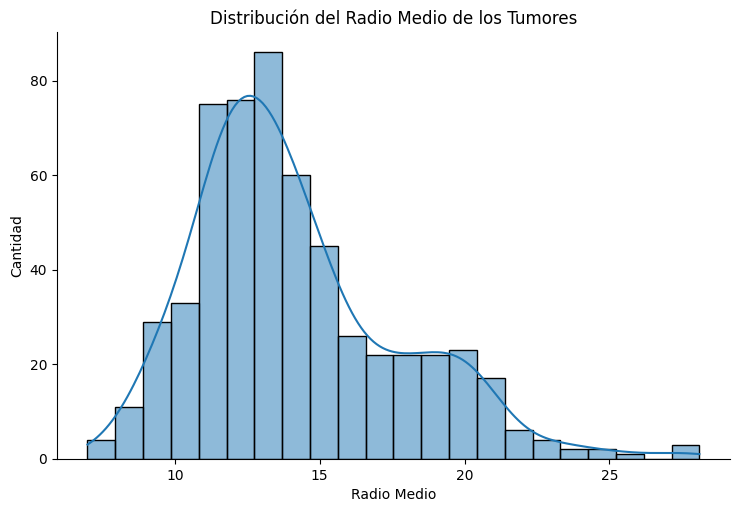

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cambiamos 'Age' por 'radius_mean' (Radio Promedio)
print("Max Radio:", df['radius_mean'].max())
print("Min Radio:", df['radius_mean'].min())

# 2. Graficar
# Nota: displot ignora plt.figure(), se ajusta con height y aspect dentro de la función.
sns.displot(data=df, x='radius_mean', kde=True, height=5, aspect=1.5)

plt.title("Distribución del Radio Medio de los Tumores")
plt.xlabel("Radio Medio")
plt.ylabel("Cantidad")
plt.show()

In [9]:
# Género: cuenta cuántos hombres y mujeres hay
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

diagnosis
0    357
1    212
Name: count, dtype: int64

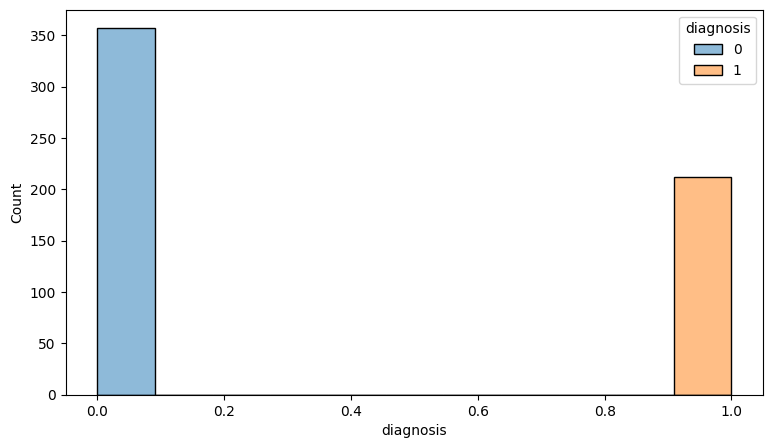

In [10]:
# Crea una gráfica de barras para los diagnosis 
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="diagnosis", hue="diagnosis")
#Cuenta los diagnosis
df["diagnosis"].value_counts()

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


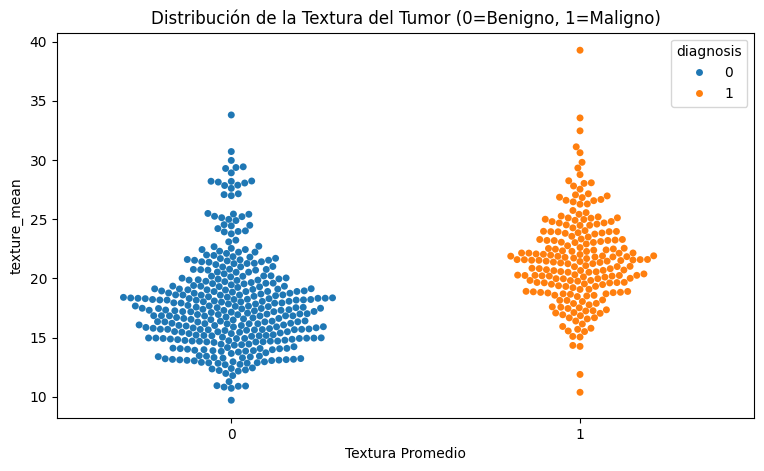

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,5))

# Usamos hue="diagnosis" para ver la diferencia entre sanos (0) y enfermos (1)
sns.swarmplot(data=df, x="diagnosis",y="texture_mean", hue="diagnosis")

plt.title("Distribución de la Textura del Tumor (0=Benigno, 1=Maligno)")
plt.xlabel("Textura Promedio")
plt.show()

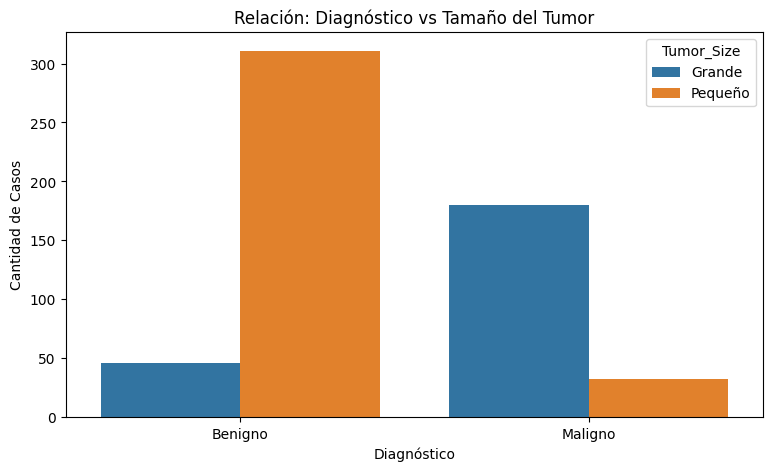

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PREPARACIÓN (Crear categorías para simular 'Género')
# Vamos a clasificar los tumores en 'Grande' o 'Pequeño' según si superan la media
media_radio = df['radius_mean'].mean()
df['Tumor_Size'] = df['radius_mean'].apply(lambda x: 'Grande' if x > media_radio else 'Pequeño')

# Hacemos que el diagnóstico sea texto para que la gráfica se entienda mejor
df['Diagnosis_Txt'] = df['diagnosis'].map({0: 'Benigno', 1: 'Maligno'})

# Grafica la relación entre el Tamaño del Tumor (como si fuera Género) y el Diagnóstico (como Medicamento)
# Primero armar una tablita para poder graficarlas
df_Size_Diag = df.groupby(['Tumor_Size', 'Diagnosis_Txt']).size().reset_index(name='Counts')

# Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="Diagnosis_Txt", y="Counts", hue="Tumor_Size", data=df_Size_Diag)

plt.title("Relación: Diagnóstico vs Tamaño del Tumor")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad de Casos")
plt.show()

C:\Users\Techie10\AppData\Local\Temp\ipykernel_12268\317028850.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Texture_Diag = df.groupby(['Texture_Level', 'Diagnosis_Txt']).size().reset_index(name='Counts')


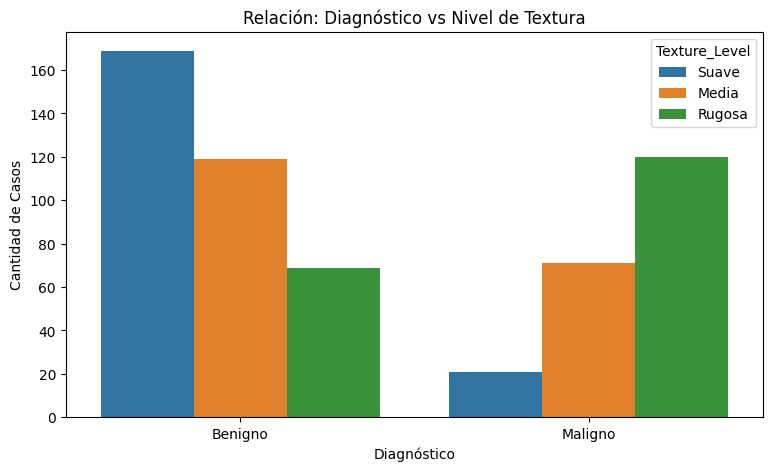

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. PREPARACIÓN (Simular 'Presión Sanguínea' con 'Textura')
# Dividimos la textura en 3 niveles iguales (qcut corta por cuantiles)
df['Texture_Level'] = pd.qcut(df['texture_mean'], q=3, labels=['Suave', 'Media', 'Rugosa'])

# Aseguramos que el diagnóstico sea texto para que se entienda
df['Diagnosis_Txt'] = df['diagnosis'].map({0: 'Benigno', 1: 'Maligno'})

# Grafica la relación entre la Textura (simulando Presión) y el Diagnóstico (simulando Medicamento)
# Primero armar una tablita para poder graficarlas
df_Texture_Diag = df.groupby(['Texture_Level', 'Diagnosis_Txt']).size().reset_index(name='Counts')

# Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="Diagnosis_Txt", y="Counts", hue="Texture_Level", data=df_Texture_Diag)

plt.title("Relación: Diagnóstico vs Nivel de Textura")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad de Casos")
plt.show()

C:\Users\Techie10\AppData\Local\Temp\ipykernel_12268\918603586.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Area_Diag = df.groupby(['Area_Level', 'Diagnosis_Txt']).size().reset_index(name='Counts')


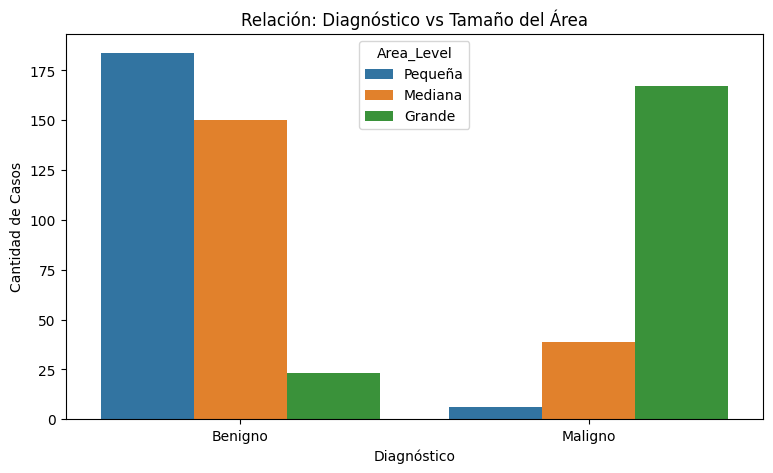

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. PREPARACIÓN (Simular 'Colesterol' con 'Área del Tumor')
# Dividimos el área en 3 niveles: Pequeña, Mediana, Grande
df['Area_Level'] = pd.qcut(df['area_mean'], q=3, labels=['Pequeña', 'Mediana', 'Grande'])

# Aseguramos que el diagnóstico sea texto
df['Diagnosis_Txt'] = df['diagnosis'].map({0: 'Benigno', 1: 'Maligno'})


# Grafica la relación entre el Área (simulando Colesterol) y el Diagnóstico
# Primero armar una tablita para poder graficarlas
df_Area_Diag = df.groupby(['Area_Level', 'Diagnosis_Txt']).size().reset_index(name='Counts')

# Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="Diagnosis_Txt", y="Counts", hue="Area_Level", data=df_Area_Diag)

plt.title("Relación: Diagnóstico vs Tamaño del Área")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad de Casos")
plt.show()

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [15]:
from sklearn.preprocessing import LabelEncoder

# Supongamos que tu DataFrame se llama 'df' y tiene la columna 'diagnosis' con 'M' y 'B'

def label_encoder(datos_categoria):
    le = LabelEncoder()
    # Convertirá 'B' (Benigno) -> 0 y 'M' (Maligno) -> 1 (o viceversa)
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

# En este dataset, la ÚNICA variable que es texto es el diagnóstico
variables = ["diagnosis"] 

for l in variables:
    label_encoder(l)

# Verificamos el cambio
print("--- Primeras filas después de LabelEncoder ---")
print(df.head())

# Verificamos qué número asignó a cada letra
# (Esto es útil para saber qué es 0 y qué es 1)
print("\n--- Verificación de clases ---")
print(f"Clases detectadas: {df['diagnosis'].unique()}")

--- Primeras filas después de LabelEncoder ---
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  smoothness_worst  compactness_worst  concavity

In [16]:
# Crear set de entrenamiento y set de prueba
x = df.drop("diagnosis", axis=1) #Variables independientes
y = df["diagnosis"]               #Variable dependiente

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11,shuffle=True)



El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# 1. LIMPIEZA CRÍTICA:
# Definimos todas las columnas que NO son características numéricas originales
# Incluye 'diagnosis' (la respuesta) y las columnas de texto que creaste para las gráficas
columnas_a_borrar = [
    'diagnosis',      # La respuesta
    'Diagnosis_Txt',  # Texto creado
    'Tumor_Size',     # Texto creado ('Grande') <--- CULPABLE DEL ERROR
    'Texture_Level',  # Texto creado
    'Area_Level'      # Texto creado
]

# Creamos X borrando todo eso. Usamos errors='ignore' por si alguna no existe.
X = df.drop(columnas_a_borrar, axis=1, errors='ignore')

# Definimos y (la etiqueta binaria)
y = df['diagnosis'] # 0 o 1

# 2. Dividir
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# 3. Escalar (OBLIGATORIO para SGD)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 4. Entrenar (Ahora sí funcionará porque x_train_scaled son solo números)
sgd = SGDClassifier(random_state=11)
sgd.fit(x_train_scaled, y_train)


,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [18]:
sgd

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [19]:
# 1. Seleccionamos el primer paciente del set de entrenamiento (ya escalado)
paciente_muestra = [x_train_scaled[0]]

# 2. El modelo hace su predicción
prediccion = sgd.predict(paciente_muestra)

# 3. Buscamos cuál era la respuesta real
valor_real = y_train.iloc[0]

# --- RESULTADOS ---
print(f"🤖 El modelo predice: {prediccion[0]}", end=" ")
print("(Maligno)" if prediccion[0] == 1 else "(Benigno)")

print(f"📄 El dato real es:   {valor_real}", end=" ")
print("(Maligno)" if valor_real == 1 else "(Benigno)")

# Verificación automática
if prediccion[0] == valor_real:
    print("\n✅ ¡Acierto!")
else:
    print("\n❌ Fallo.")

🤖 El modelo predice: 1 (Maligno)
📄 El dato real es:   1 (Maligno)

✅ ¡Acierto!


👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [20]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, x_train, y_train, scoring='accuracy', cv=3) #3 valores, porque se ha entranado 3 veces cada vez con un trozo diferente de los datos como validación. Sacando el dato de porcentaje de exactitud o de acierto.

array([0.89473684, 0.91447368, 0.86754967])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [21]:
# Modelo que nunca es Y
from sklearn.base import BaseEstimator
class NuncaC(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)

nunca_c = NuncaC()
cross_val_score(nunca_c, x_train, y_train, scoring='accuracy', cv=3) 

array([0.61842105, 0.63815789, 0.59602649])

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [22]:
# Matriz de confusión (lo explicado con perros y gatos)
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[259,  22],
       [ 27, 147]])

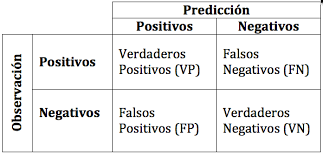

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [23]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score
P = precision_score(y_train, y_train_pred) 
r = recall_score(y_train, y_train_pred)    
P,r

(0.8698224852071006, 0.8448275862068966)

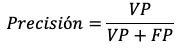

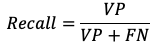

In [24]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11)
rfc.fit(x_train, y_train)

#Hacer la matriz de confusión otra vez
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[276,   5],
       [ 12, 162]])

In [25]:
#Calcular la precisión y recall con el nuevo clasificador 
P = precision_score(y_train, y_train_pred) 
r = recall_score(y_train, y_train_pred)    
P,r

(0.9700598802395209, 0.9310344827586207)

In [26]:
from sklearn.metrics import f1_score

# 1. Generamos las predicciones sobre el set de prueba (si no lo has hecho aún)
# Recuerda usar los datos ESCALADOS (x_test_scaled)
y_pred = sgd.predict(x_test_scaled)

# 2. Calculamos el F1
# Nota: Si usaste la máscara booleana (y_test_y), pon eso en lugar de y_test.
# Funcionará igual porque True=1 y False=0.
f1 = f1_score(y_test, y_pred) # O f1_score(y_test_y, y_pred)

print(f"F1-Score: {f1:.4f}")

F1-Score: 0.9610


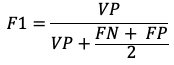

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [27]:
# Seleccionamos al primer paciente del set de prueba (que ya tiene las 30 características y está escalado)

# Calculamos la puntuación de decisión
y_score = sgd.decision_function([x_test_scaled[0]])

y_score

array([97.93032399])

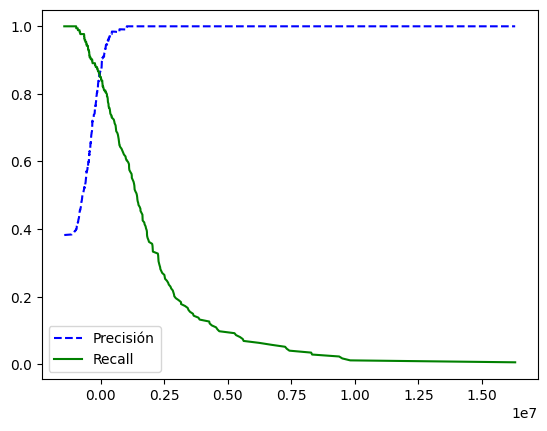

In [28]:
#Graficar la precisión y recall 
y_scores = cross_val_predict(sgd, x_train, y_train, cv=3, method="decision_function")
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train, y_scores)
plt.plot(umbrales, precisions[:-1], "b--", label="Precisión")
plt.plot(umbrales, recalls[:-1], "g-", label="Recall")
plt.legend()
plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [29]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]
umbral_90

np.float64(54175.17455169362)

In [30]:
#Arroja la precisión y recall para un umbral de 90
y_train_90 = (y_scores >= umbral_90)
p = precision_score(y_train, y_train_90)
r = recall_score(y_train, y_train_90)

p,r

(0.9012345679012346, 0.8390804597701149)

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [31]:
#Importar roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, umbrales_roc = roc_curve(y_train, y_scores)

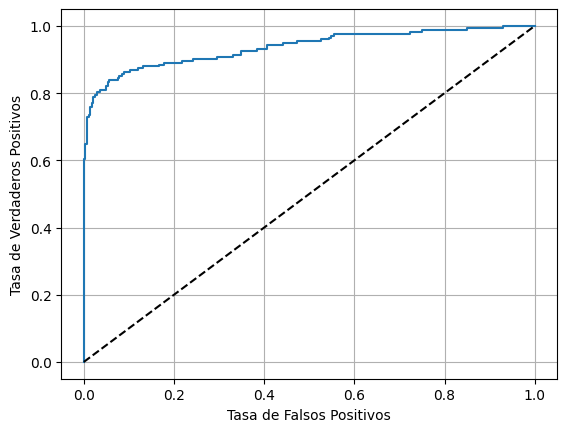

In [32]:
#Graficar la curva ROC
plt.plot(fpr, tpr, label="Curva ROC")
plt.plot([0,1],[0,1],'k--') #Línea diagonal
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
#Poner una cuadrícula
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [33]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9366384423446639

In [34]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc, x_train, y_train, cv=3, method="predict_proba")
y_scores_forest = y_forest[:,1] #Solo nos quedamos con la probabilidad de que sea 1

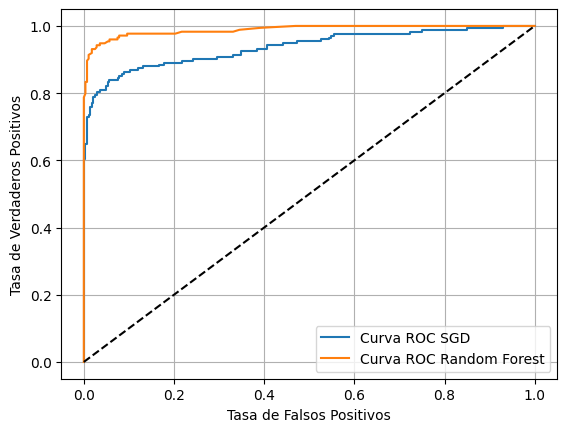

In [35]:
#Graficar la curva ROC y la predicción de random forest 
fpr_forest, tpr_forest, umbrales_roc_forest = roc_curve(y_train, y_scores_forest)
plt.plot(fpr, tpr, label="Curva ROC SGD")
plt.plot(fpr_forest, tpr_forest, label="Curva ROC Random Forest")
plt.plot([0,1],[0,1],'k--') #Línea diagonal
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.grid()
plt.show()

In [36]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train, y_scores_forest)

0.9886386877735509

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [37]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
import pandas as pd

# 1. Instanciar y Entrenar (Usando datos ESCALADOS)
svm = SVC()
svm.fit(x_train_scaled, y_train)

# 2. Predecir a un humano aleatorio
# CORRECCIÓN: Usamos un solo par de corchetes [] envolviendo el array.
# x_test_scaled[0] es la fila de datos (el array de números).
# Al ponerlo dentro de [], le decimos a Pandas: "Esta es la primera fila".
sample = pd.DataFrame([x_test_scaled[0]], columns=x_train.columns)

# Visualizar la muestra para confirmar que tiene las 30 columnas correctas
print("--- Muestra del Paciente ---")
print(sample)

# 3. Hacer la predicción
prediccion = svm.predict(sample)

--- Muestra del Paciente ---
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      1.41007       0.75212        1.437205   1.386651        -0.825369   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.672359        0.246517             0.451533      -0.183154   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0               -1.044316  ...      1.457298       1.046275         1.743087   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    1.427742         -0.045669           1.908533         0.507886   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              0.817872        0.469058                 0.433119  

[1 rows x 30 columns]


c:\Users\Techie10\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [38]:
#Utilizar decision_function para observar los puntajes
svm.decision_function(sample)
#Decidirá por el qué tenga mayor puntaje

c:\Users\Techie10\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([2.42340222])

In [39]:
#Ahora, utiliza el clasificador multiclase 
from sklearn.multiclass import OneVsRestClassifier
svm = OneVsRestClassifier(SVC())
svm.fit(x_train, y_train)
#Predecir a un humano ahora con este clasificador
svm.predict(sample)

array([0])

In [40]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function(sample)

array([-1.15203533])

In [41]:
#campararlo con los datos obtenidos de sgd.fit 
sgd.fit(x_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [42]:
sgd.predict(sample)

array([0])

***

## <span style="color:green">8. Analizar Errores</span>

In [43]:
#Hacer un clasificador de random forest
rfc.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
#Utilizar la matriz de confusión 
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)
cnf_mz = confusion_matrix(y_train, y_train_pred)
cnf_mz #Los números fuera de la diagonal son los falsos positivos

array([[276,   5],
       [ 12, 162]])

In [45]:
#utilizar ahora SGD
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
cnf_mz_sgd = confusion_matrix(y_train, y_train_pred)
cnf_mz_sgd

array([[259,  22],
       [ 27, 147]])